<h2 style="text-align:center; font-weight: 700;">Optimizers for Supervised Deep Learning models</h2>

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

<h3>Auxiliary Functions</h3>

In [2]:
def binary_sigmoidal(Y_in):
  return 1 / (1 + np.exp(-Y_in))

def find_Y_hat(x, w, b):
  if type(x) == type([1]) or type(x) == type((1, 2)):  # if list of list or list of tuples is used, individual list/tuple should be handled differently
    Y_in = np.dot(x, w) + b                            # layer of input neurons (if list of values passed as neuron)
  else:
    Y_in = x * w + b
  Y_hat = binary_sigmoidal(Y_in)
  
  return Y_hat

In [3]:
def delta_w(x, y, Y_hat):
  return(-2 * (y - Y_hat) * Y_hat * (1 - Y_hat) * x)    # derivative of binary sigmoidal is y_hat(1 - y_hat) and no, not y_in, y_hat is correct. Refer notes for more clarity

In [4]:
def delta_b(y, Y_hat):
  return(-2 * (y - Y_hat) * Y_hat * (1 - Y_hat))

In [5]:
X = [0.5, 2.5, 1.2]       # adding in a third point to make mini-batch GD actually work in mini-batches instead of either being stochastic or batch GD
Y = [0.2, 0.9, 0.4]
# X = [0.5, 2.5]
# Y = [0.2, 0.9]
noofepochs = 300
df = pd.DataFrame([(x, y) for x, y in zip(X, Y)], columns = ['X', 'Y'])
df.head()

,X,Y
0,0.5,0.2
1,2.5,0.9
2,1.2,0.4


<h3>Stochastic Gradient Descent with Momentum</h3>
<p style="font-size: 14px;">Weight Updation when: After <i><b>each and every</b></i> record (row) in an epoch, but indirectly, i.e considering updation caused by past records as well (I am carrying it out similar to SGD)</p>


In [6]:
def sgd_w_momentum(X, Y, noofepochs = 300, ß = 0.5):
  w = -2; η = 1; b = -2;
  dw, db, vw, vb = 0, 0, 0, 0
  y_hat_mega_list = []
  error_mega_list = []
  weights_mega_list = []
  bias_mega_list = []

  for i in range(noofepochs):
    y_hat_list = []
    error_list = []

    for x, y in zip(X, Y):
      Y_hat = find_Y_hat(x, w, b)
      y_hat_list.append(Y_hat)
      error_list.append((y - Y_hat) ** 2)
      dw = delta_w(x, y, Y_hat)
      db = delta_b(y, Y_hat)
      vw = ß * vw + (1 - ß) * dw      # 'v_' term updates considering previous 'v_' term, this is what we mean when considering the past
      vb = ß * vb + (1 - ß) * db
      w += (-η * vw)
      b += (-η * vb)

    vw, vb = 0, 0                   #! history is per epoch, have to reset it after the end of one
    
    y_hat_mega_list.append(y_hat_list)
    error_mega_list.append(error_list)
    weights_mega_list.append(w)
    bias_mega_list.append(b)
    # print(f"Epoch {i + 1}, w = {w} & b = {b} | Y_hat: {y_hat_list}")
    
  return y_hat_mega_list, error_mega_list, weights_mega_list, bias_mega_list

In [7]:
y_hats_sgdm, errors_sgdm, weights_sgdm, biases_sgdm = sgd_w_momentum(X, Y, noofepochs)

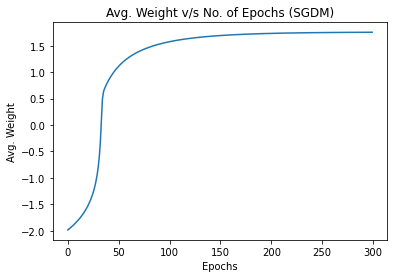

In [8]:
plt.title("Avg. Weight v/s No. of Epochs (SGDM)")
epoch_range = [i for i in range(noofepochs)]
weight_range = [w for w in weights_sgdm]
plt.plot(epoch_range, weight_range)
plt.xlabel('Epochs')
plt.ylabel('Avg. Weight')
plt.show()